<a href="https://colab.research.google.com/github/sherlockieee/cs166/blob/main/CS166_Problem_Set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thanks to Hovik for helping me with the animation, and Minh for setting up coworking sessions and being my accountability partner.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from matplotlib import animation
from IPython.display import HTML

## Problem 1

The system I choose to model is the climate system. For instance, we can measure the carbon dioxide and its impacts on temperature change, while looking into how different agents alleviate/ exacerbate this change in atmospheric carbon.

- Scale: This is on the Earth's scale - so we are looking at global behaviors of the carbon cycle. While we arguably can look at smaller scale, a global scale is most appropriate because carbon emission is not restricted to any local environment, but is spread across the atmosphere, so impacts on any place of the world will have an impact on a global system. However, because the system itself is very large, the breakdown of components will also be more macroscopic.
- Components: We can briefly divide them into components that majorly contribute to carbon emissions (both as a source and sink of carbon). This would mean anthropogenic influences, oceans/ hydrosphere, soil/ lithosphere, vegetations/ biosphere, ice/ cryosphere and atmosphere. Even though human impacts are technically tied with biosphere, the impacts are so astronomical and wildly fluctuating that it deserves to be a component.
- State: The 3 simple state that each component can take is: taking in carbon (sink), releasing carbon (source), and being carbon neutral (neither taking in or releasing). We can further complicate with the size of of the fluxes.
- Relationships: There's an interdependent relationship for all of the components. E.g. oceans influences the atmosphere, which in turns influence lithospheres and biospheres. Cryosphere influences hydrosphere. Anthropogenic influences affect all of them. We can map connection for individual relationship.
- Changes: The state can changes depending on whether there is a positive versus negative feedback for each component. For instance, the increasing source of carbon from anthropogenic influences have led to the ocean becoming a sink for carbon by absorbing the extra carbon dioxide released in the atmosphere (negative feedback). Meanwhile, the increasing temperature and acidification of the ocean has also led to melting of ices, which releases microbes that would create a net source of carbon (positive feedback).
- Macro behaviors: We can predict the eventual fluctuation in temperature according to time range and feedback loops between different components (eg. change in human's emissions will not necessarily leads to decrease in temperature in the short run as the ocean might recallibrate and release back the carbon dioxide into the atmosphere).

## Problem 2


In [ ]:
numbers = np.random.randint(100, size = 1000000)

1. Make a properly formatted histogram of the number of times each value appears.

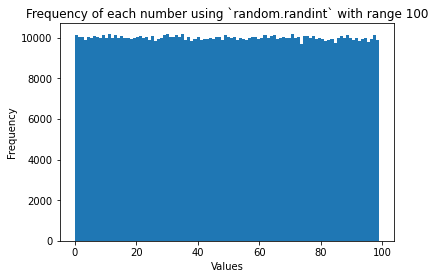

In [ ]:
plt.hist(numbers, bins = 100)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Frequency of each number using `random.randint` with range 100")
plt.show()

Expected frequency for each value = 1,000,000/100 = 10,000


In [ ]:
print(f"Expected frequency for each value = {1000000/100}")
print(f"Actual frequency for each value = {sorted(list(Counter(numbers).items()))}")

freq_list = list(Counter(numbers).values())

print(f"Actual frequency mean = {np.mean(freq_list)}")
print(f"Actual frequency variance = {np.var(freq_list)}")

Expected frequency for each value = 10000.0
Actual frequency for each value = [(0, 10115), (1, 10019), (2, 10053), (3, 9889), (4, 10031), (5, 9978), (6, 10074), (7, 10054), (8, 9968), (9, 10121), (10, 9967), (11, 10176), (12, 9986), (13, 10157), (14, 9996), (15, 10072), (16, 9973), (17, 10002), (18, 9928), (19, 10010), (20, 10036), (21, 10093), (22, 9988), (23, 10052), (24, 9910), (25, 10070), (26, 9837), (27, 9955), (28, 9993), (29, 10125), (30, 10172), (31, 10062), (32, 10019), (33, 10123), (34, 10020), (35, 10194), (36, 9884), (37, 10036), (38, 9831), (39, 9921), (40, 10049), (41, 9878), (42, 9947), (43, 9956), (44, 9991), (45, 9960), (46, 10053), (47, 10054), (48, 9910), (49, 10154), (50, 10059), (51, 10014), (52, 10020), (53, 9895), (54, 9967), (55, 9920), (56, 9911), (57, 10008), (58, 10018), (59, 10016), (60, 9945), (61, 9968), (62, 10161), (63, 9972), (64, 10079), (65, 10124), (66, 9942), (67, 9974), (68, 10027), (69, 10002), (70, 9969), (71, 10202), (72, 9996), (73, 10061), (7

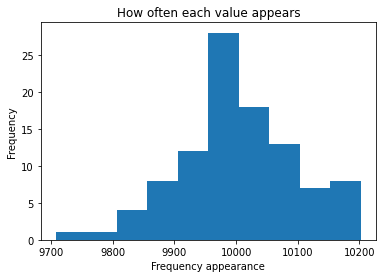

In [ ]:
plt.hist(freq_list)
plt.xlabel("Frequency appearance")
plt.ylabel("Frequency")
plt.title("How often each value appears")
plt.show()

We can see that every number appear around 10,000 times, with a range from 9700 to 10200 times. This coincides with the expectation that the random module would generate value at roughly the mean, and with more spread from both sides. According to the CLT, we can expect that as we increase our number of simulations, the variance would get smaller, eventually approaching 0. 

## Problem 3

At time $t$, the probability mean density of empty, tree and fire are $\rho_e$, $\rho_t$ and $\rho_f$ respectively. 

$\rho_e + \rho_t + \rho_f = 1$

At time $t+1$:

All fire cells become empty => $\rho_f$ becomes empty.
 
$p\%$ of the empty tree becomes tree, the rest stay empty => $(1-p)\rho_e$ stays empty, $p\rho_e$ becomes tree.

Of all the tree cells:

Probability of 0 neighbor being a fire = $(1-\rho_f)^{2d}$

- This is because any one cell has a probability $\rho_f$ of being a fire cell, hence probability $(1-\rho_f)$ of not being a fire cell. We want all the Von Neumann's neighbors to not be a fire cell => Probability = $(1-\rho_f)^4$ for $d=2$, or generally $(1-\rho_f)^{2d}$.

→ P(fire | 0 neighbors are fire) = $\rho_t (1-g) f (1 - \rho_f)^{2d}$

Probability of at least 1 neighbor being a fire = $1 - (1-\rho_f)^{2d}$
→ P(fire | at least 1 neighbor are fire) = $\rho_t (1-g) (1 - (1 - \rho_f)^{2d})$

→ Mean density of fire in the next time step
$$
= \rho_t (1-g) f (1 - \rho_f)^{2d} + \rho_t (1-g) (1 - (1 - \rho_f)^{2d})\\
=\rho_t(1-g) (f (1-\rho_f)^{2d} + 1 - (1 - \rho_f)^{2d})\\
= \rho_t(1-g) (  f (1-\rho_f)^{2d} + 1 - (1 - \rho_f)^{2d} - f + f) \\
= \rho_t(1-g) (f + (1 - (1 - \rho_f)^{2d}) - f( 1 - (1 - \rho_f)^{2d})) \\
= \rho_t(1-g) (f + (1 - f) (1 - \rho_f)^{2d}))
$$

Mean density of empty cells at next time step = $\rho_f + (1-p)\rho_e$

Mean density of tree in the next time step = $p\rho_e + \rho_t - \rho_t(1-g) (f + (1 - f) (1 - \rho_f)^{2d}))$




$∴△\rho_e = \rho_f + (1 - p)\rho_e - \rho_e = \rho_f - p\rho_e $

$∴△\rho_t = p\rho_e + \rho_t - \rho_t(1-g) (f + (1 - f) (1 - \rho_f)^{2d})) - \rho_t = p\rho_e - \rho_t(1-g) (f + (1 - f) (1 - \rho_f)^{2d}))$

$∴△\rho_f =  \rho_t(1-g) (f + (1 - f) (1 - \rho_f)^{2d})) - \rho_f$



## Problem 4: Wireworld

In [ ]:
class Wireworld:
    '''
    Contain Wireworld simulation

    Parameters
    ----------
    initial_setup: string
        The initial wire setup
    

    Attributes
    ----------
    current_state: list[list[int]]
        The current state of the simulation
    height: int
        The height of the simulation space
    width: int
        The width of the simulation space
    fig, axes: matplotlib.subplot
        The figure and its corresponding axes
    '''
    #setting up variables
    BG = 0
    WIRE = 1
    TAIL = 2
    HEAD = 3

    def __init__(self, initial_setup):
        self.current_state, self.height, self.width = self.__setup(initial_setup)
        self.fig, self.axes = plt.subplots()
        

    def __map_char_to_value(self, char):
        '''
        Private function to map character to the value on the wireworld state

        Parameters
        ----------
        char: string
            The value to be mapped to wireworld states

        Returns
        ----------
        int
            The mapping value of wireworld states
        '''
        if char == ' ':
            return self.BG
        elif char == '.':
            return self.WIRE
        elif char == 't': 
            return self.TAIL
        elif char == 'H':
            return self.HEAD
        else:
            raise ValueError(f'Incorrect input character: {char}')

    def __setup(self, initial_setup):
        '''
        Private function to set up the wireworld state from the given string

        Parameters
        ----------
        initial_setup: string
            The entire string of an intiial setup

        Returns
        ----------
        list[list[int]], int, int
            The wireworld state, its height and width
        '''
        lines = initial_setup.split("\n")
        height = len(lines)
        width = max([len(l) for l in lines])
        world = np.zeros((height, width), int)
        for r, line in enumerate(lines):
            for c, char in enumerate(line):
                world[r][c] = self.__map_char_to_value(char)
        return world, height, width

    def __update_cell(self, x, y):
        '''
        Private function to update a cell to a new value

        Parameters
        ----------
        x: int
            The row index in the wireworld state
        y: int
            The column index in the wireworld state

        Returns
        ----------
        int
            The wireworld state for the cell
        '''
        if self.current_state[x][y] == self.BG:
            return self.BG
        elif self.current_state[x][y] == self.HEAD:
            return self.TAIL
        elif self.current_state[x][y] == self.TAIL:
            return self.WIRE
        elif self.current_state[x][y] == self.WIRE:
            heads = 0
            for dx in range(-1, 2):
                for dy in range(-1, 2):
                    if x + dx < 0 or x + dx >= self.height or y + dy < 0 or y + dy >= self.width:
                        continue
                    if self.current_state[x + dx][y + dy] == self.HEAD:
                        heads += 1
            if heads == 1 or heads == 2:
                return self.HEAD
            return self.WIRE
        raise ValueError(f'Incorrect character in current state: {self.current_state[x][y]}')


    def update(self):
        '''
        Update the entire state to the next state

        Parameters
        ----------
        None

        Returns
        ----------
        None
        '''
        next_state = np.zeros((self.height, self.width), int)
        for x in range(self.height):
            for y in range(self.width):
                next_state[x][y] = self.__update_cell(x, y)
        self.current_state = next_state

    def create_visualization(self):
        '''
        Create a visualization plot of the state

        Parameters
        ----------
        None

        Returns
        ----------
        plot
            The plot of the current wireworld state
        '''
        plot = self.axes.pcolor( self.current_state, vmin = 0, vmax = 3)
        self.axes.axis('image')
        return plot
        

In [ ]:
initial_setup = '''
 ......tH
.        ......
 ...Ht...      .
              ....
              .  .....
              ....
 tH....tH      .
.        ......
 ........ 
 '''



In [69]:
def animate(simulation, total_frames = 100, interval = 200):
    def update(i):
        simulation.update()
        return [simulation.create_visualization()]
    animated_sim = animation.FuncAnimation(simulation.fig, update, 
                                           init_func=lambda: [], 
                                           frames=total_frames, interval=interval)
    output = HTML(animated_sim.to_html5_video())
    simulation.fig.clf()
    return output

In [ ]:
wireworld = Wireworld(initial_setup)

animate(wireworld)

<Figure size 432x288 with 0 Axes>